# Randomly Decaying Sequence
Given a fixed real number $c$, define a random sequence $(X_n)_{n \geq 0}$ by the following random process:

- $X_0 = c$ (with probability 1).
- For $n > 0$, $X_n = U_n X_{n-1}$, where $U_n$ is a real number chosen at random between 0 and 1, uniformly and independently of all previous choices $(U_m)_{m < n}$.

If we desire there to be precisely a 25% probability that $X_{100} < 1$, then this can be arranged by fixing $c$ such that $\log_{10} c \approx 46.27$.

Suppose now that $c$ is set to a different value, so that there is precisely a 25% probability that $X_{10,000,000} < 1$.

Find $\log_{10} c$, and give your answer rounded to two decimal places.


$X_n = U_n X_{n-1} = U_n U_{n-1} X_{n-2} = \ldots = \prod_{i=1}^n U_i X_0 = c \prod_{i=1}^n U_i$.

$X_{100} = c \prod_{i=1}^{100} U_i$.

If I want $X_{100} < 1$, then I need $c \prod_{i=1}^{100} U_i < 1$.

$P(X_{100} < 1) = P(c \prod_{i=1}^{100} U_i < 1) = P\left(\prod_{i=1}^{100} U_i < \frac{1}{c}\right)
= P(U^{100} < \frac{1}{c})$

Since $U$ is non negative:

$U^{100} < \frac{1}{c} \Rightarrow U < \frac{1}{c^{1/100}} \\$

$\int_0^{\frac{1}{c^{1/100}}} f(x) \, dx$

Where $f(x)$ is the probability density function of $U$, I.E.: \
$f(x) = 1$ if $0 \leq x \leq 1$ and $0$ otherwise.

Therefore: \
$
P(X_{100} < 1) = \int_0^{\frac{1}{c^{1/100}}} f(x) \, dx = \int_0^{\frac{1}{c^{1/100}}} 1 \, dx = \frac{1}{c^{1/100}}$

1/c**(1/99) = 0.25
4 = c**(1/99)
1/99 * log(c) = log(4)

In [43]:
from math import log10
log10(4)*100

59.603939141468274

In [6]:
from math import log10

46.27/log10(4)

76.85280647521913

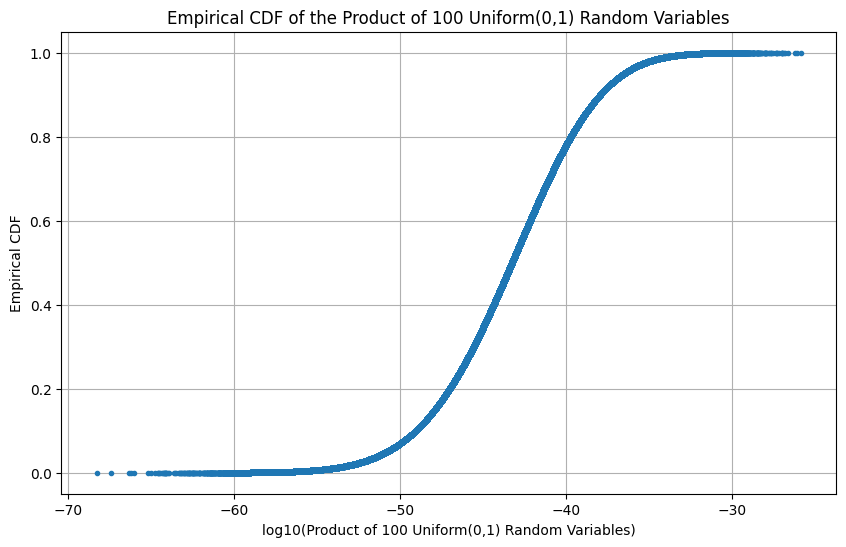

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Number of simulations and number of variables
num_simulations = 10**6
num_variables = 100

# Generate the random variables (uniform between 0 and 1)
X = np.random.rand(num_simulations, num_variables)

# Compute the product of the 100 random variables for each simulation
Y = np.prod(X, axis=1)

# Sort the products to calculate the empirical CDF
Y_sorted = np.sort(Y)
cdf_estimate = np.arange(1, num_simulations + 1) / num_simulations

plt.figure(figsize=(10, 6))
plt.plot(np.log10(Y_sorted), cdf_estimate, marker='.', linestyle='none')
plt.xlabel('log10(Product of 100 Uniform(0,1) Random Variables)')
plt.ylabel('Empirical CDF')
plt.title('Empirical CDF of the Product of 100 Uniform(0,1) Random Variables')
plt.grid(True)
plt.show()

In [26]:
# Number of simulations and number of variables
num_simulations = 10**1
num_variables = 10**7

# Generate the random variables (uniform between 0 and 1)
X = np.random.rand(num_simulations, num_variables)

Y = np.sum(np.log10(X), axis=1)
Y_sorted = np.sort(Y)

Y_sorted[int(1*num_simulations/4)]

np.float64(-4344625.528361308)

In [22]:
Y_sorted[int(1*num_simulations/4)]

np.float64(-46.27397176971766)

In [69]:
from scipy.stats import gamma

gamma.cdf(10**46.27, 100)


np.float64(1.0)

In [78]:
from scipy import optimize
import numpy as np

def f(x):
    return gamma.cdf(x, 10**7) - 0.75

optim = optimize.root_scalar(f, bracket=[-1000000, 1000000000])

# np.log10(np.exp(optim.root))
optim.root/np.log(10)

np.float64(4343871.057176295)

In [61]:
93.08/np.log(10)

np.float64(40.424130375554675)

In [67]:
106.551/np.log(10)

np.float64(46.27451134127338)